#### **Stable coins Comparision**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.set(style = 'darkgrid')

df = pd.read_csv('D:\Crypto\Data\crypto_date.csv')

df.drop(columns='Unnamed: 0',inplace = True)

df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df = df.dropna()

In [3]:
stablecoins = ["Tether", "USD Coin", "Ethena USDe"]

In [4]:
df = df[df['name'].isin(stablecoins)]

In [5]:
df_1 = df[df['name'] == 'Tether'][['date','price']]
df_2 = df[df['name'] == 'Ethena USDe'][['date','price']]
df_3 = df[df['name'] == 'USD Coin'][['date','price']]

In [6]:
df_3

,date,price
13287,2018-10-09,1.00686
13300,2018-10-10,1.00962
13312,2018-10-11,1.00978
13317,2018-10-12,1.01272
13332,2018-10-13,1.00743
...,...,...
60690,2025-08-01,1.00030
60715,2025-08-02,1.00010
60737,2025-08-03,0.99990
60762,2025-08-04,1.00000


In [ ]:
t1 = pd.merge(df_1,df_2,on = 'date',suffixes=('_tether','_USDe'))

In [14]:
t1

,date,price_tether,price_USDe
0,2024-04-09,0.9998,1.2440
1,2024-04-10,1.0002,1.4630
2,2024-04-11,1.0002,1.3760
3,2024-04-12,1.0002,1.2780
4,2024-04-13,1.0011,1.0480
...,...,...,...
477,2025-08-01,0.9998,0.5799
478,2025-08-02,1.0002,0.5220
479,2025-08-03,1.0006,0.5934
480,2025-08-04,1.0000,0.6039


In [15]:
t2 = pd.merge(t1, df_3, on='date', suffixes=('_t1', '_df3'))

In [18]:
t2 = t2.rename(columns = {'price_tether':'tether','price_USDe':'USDe','price':'USDc'})

In [26]:
df = t2
df

,date,tether,USDe,USDc
0,2024-04-09,0.9998,1.2440,1.0004
1,2024-04-10,1.0002,1.4630,1.0000
2,2024-04-11,1.0002,1.3760,0.9999
3,2024-04-12,1.0002,1.2780,0.9996
4,2024-04-13,1.0011,1.0480,0.9987
...,...,...,...,...
477,2025-08-01,0.9998,0.5799,1.0003
478,2025-08-02,1.0002,0.5220,1.0001
479,2025-08-03,1.0006,0.5934,0.9999
480,2025-08-04,1.0000,0.6039,1.0000


Text(0.5, 1.0, 'Price Stability Comparison of Major Stablecoins (USDT, USDC, USDe)')

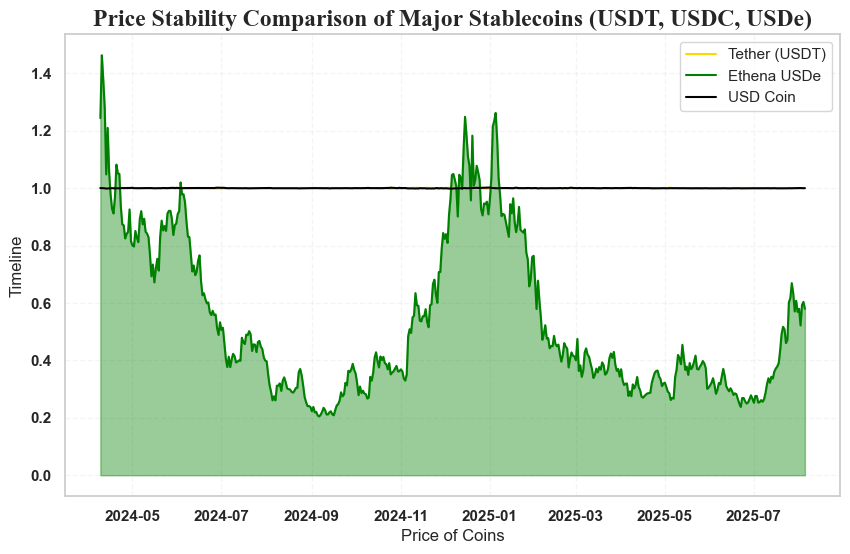

In [50]:
plt.figure(figsize = (10,6))
sns.set(style = 'whitegrid')
plt.grid(True,linestyle = '--',alpha = 0.2)
sns.lineplot(data = df,x = 'date',y = 'tether',label = 'Tether (USDT)',color = 'gold')
plt.fill_between(df['date'],df['USDe'],color = 'green',alpha = 0.4)
sns.lineplot(data = df,x = 'date',y = 'USDe',label = 'Ethena USDe',color = 'green')
sns.lineplot(data = df,x = 'date',y = 'USDc',label = 'USD Coin',color = 'black')
plt.xlabel('Price of Coins')
plt.ylabel('Timeline')
plt.xticks(fontweight = 'bold')
plt.yticks(fontweight = 'bold')
plt.title('Price Stability Comparison of Major Stablecoins (USDT, USDC, USDe)',fontsize = 17,fontfamily = 'Times New Roman',fontweight = 'bold')
